In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('planets.csv')

In [4]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
df.dropna()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


In [6]:
df.ffill()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,1.54,172.00,2006
1031,Transit,1,2.615864,1.54,148.00,2007
1032,Transit,1,3.191524,1.54,174.00,2007
1033,Transit,1,4.125083,1.54,293.00,2008


In [7]:
df['radius'] = (df['distance']**0.5) * 6371

In [8]:
df["name"] = df["method"] + " " + df["year"].astype(str)

In [9]:
# 1. Print the total number of entries in the dataset.
df.shape

(1035, 8)

In [10]:
# 2. What are the most common methods used for discovering exoplanets
cm = df['method'].value_counts().idxmax()
cm

'Radial Velocity'

In [11]:
# 3. How many exoplanets were discovered each year
year = df['year'].value_counts().sort_index()
year

year
1989      1
1992      2
1994      1
1995      1
1996      6
1997      1
1998      5
1999     15
2000     16
2001     12
2002     32
2003     25
2004     26
2005     39
2006     31
2007     53
2008     74
2009     98
2010    102
2011    185
2012    140
2013    118
2014     52
Name: count, dtype: int64

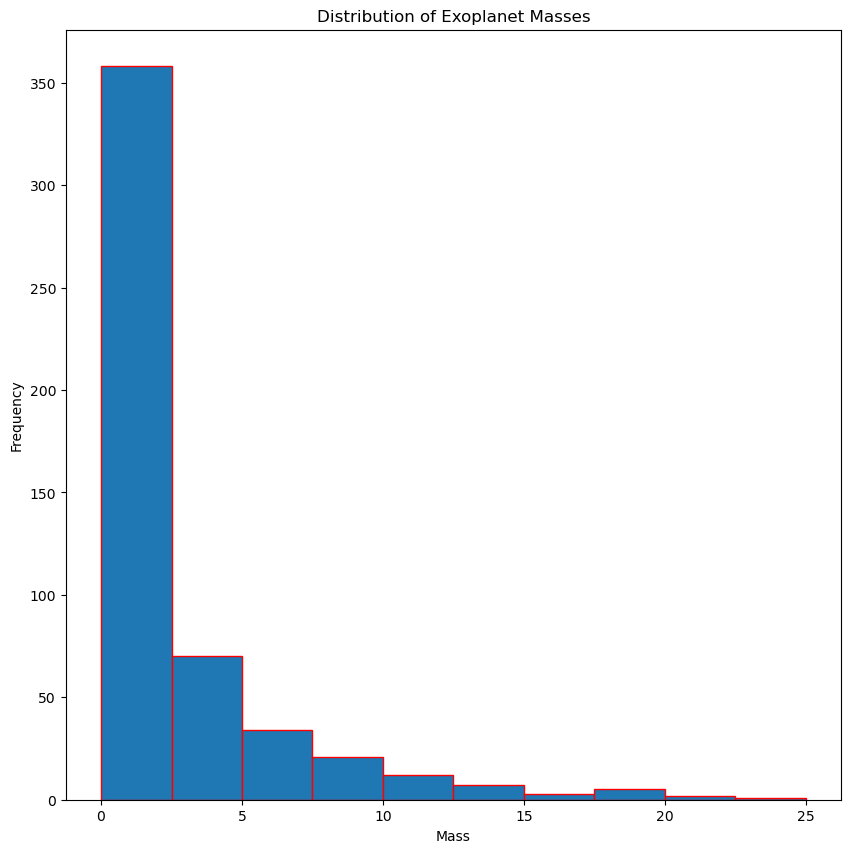

In [12]:
# 4. Plot the distribution of exoplanet masses.
plt.figure(figsize=(10,10))
plt.hist(df['mass'], edgecolor='red')
plt.xlabel('Mass')
plt.ylabel('Frequency')
plt.title('Distribution of Exoplanet Masses')
plt.show()

In [13]:
# 5. Calculate the correlation between exoplanet mass and radius.
cr = df['mass'].corr(df['radius'])
cr

0.29303135068805336

In [14]:
# Find the exoplanet with the largest radius
largest_radius_planet = df[df["radius"].notnull()].nlargest(1, "radius")
largest_radius_name = largest_radius_planet["name"].values[0]
largest_radius_value = largest_radius_planet["radius"].values[0]

# Find the exoplanet with the smallest radius
smallest_radius_planet = df[df["radius"].notnull()].nsmallest(1, "radius")
smallest_radius_name = smallest_radius_planet["name"].values[0]
smallest_radius_value = smallest_radius_planet["radius"].values[0]

# Print the results
print(f"Exoplanet with the largest radius: {largest_radius_name} (Radius: {largest_radius_value})")
print(f"Exoplanet with the smallest radius: {smallest_radius_name} (Radius: {smallest_radius_value})")

Exoplanet with the largest radius: Transit 2006 (Radius: 587377.1773741299)
Exoplanet with the smallest radius: Radial Velocity 2012 (Radius: 7402.433069606236)


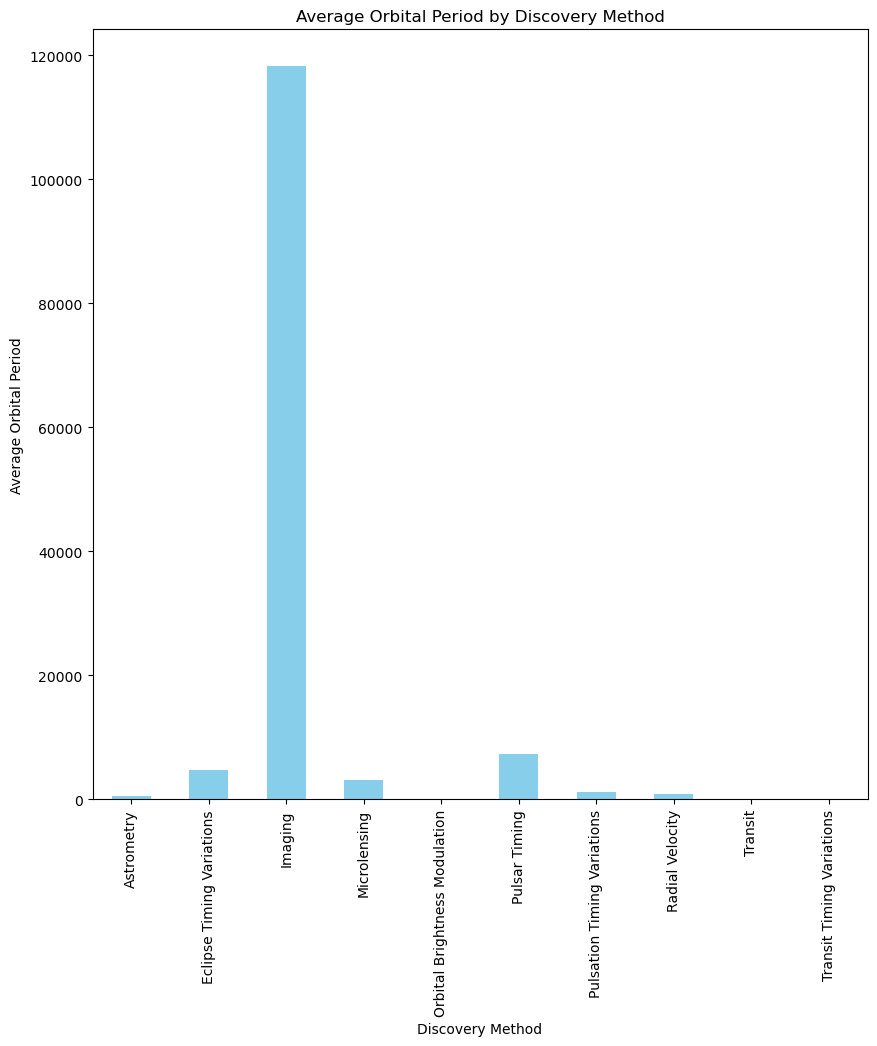

In [15]:
# 7. Plot the average orbital period by discovery method.
plt.figure(figsize=(10,10))
avg = df.groupby('method')['orbital_period'].mean()
avg.plot(kind='bar', color='skyblue')
plt.xlabel('Discovery Method')
plt.ylabel('Average Orbital Period')
plt.title('Average Orbital Period by Discovery Method')
plt.show()

In [16]:
# 8. Calculate the percentage of exoplanets discovered using each method.
percentage = df['method'].value_counts(normalize=True) * 100
percentage

method
Radial Velocity                  53.429952
Transit                          38.357488
Imaging                           3.671498
Microlensing                      2.222222
Eclipse Timing Variations         0.869565
Pulsar Timing                     0.483092
Transit Timing Variations         0.386473
Orbital Brightness Modulation     0.289855
Astrometry                        0.193237
Pulsation Timing Variations       0.096618
Name: proportion, dtype: float64

In [17]:
# 9. Print the names of exoplanets discovered using the transit method with a radius greater than 2 Earth radii.
transit_planets = df[(df['method'] == 'Transit') & (df['radius'] > 2)]
transit_planets

,method,number,orbital_period,mass,distance,year,radius,name
92,Transit,1,1.742994,NaN,200.0,2008,90099.546059,Transit 2008
93,Transit,1,4.256800,NaN,680.0,2008,166135.354094,Transit 2008
97,Transit,2,0.853585,NaN,150.0,2009,78028.495756,Transit 2009
99,Transit,1,6.212290,NaN,380.0,2010,124193.653542,Transit 2010
100,Transit,1,95.273800,NaN,460.0,2009,136642.727066,Transit 2009
...,...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.0,2006,83554.881677,Transit 2006
1031,Transit,1,2.615864,NaN,148.0,2007,77506.560161,Transit 2007
1032,Transit,1,3.191524,NaN,174.0,2007,84039.261860,Transit 2007
1033,Transit,1,4.125083,NaN,293.0,2008,109053.953679,Transit 2008


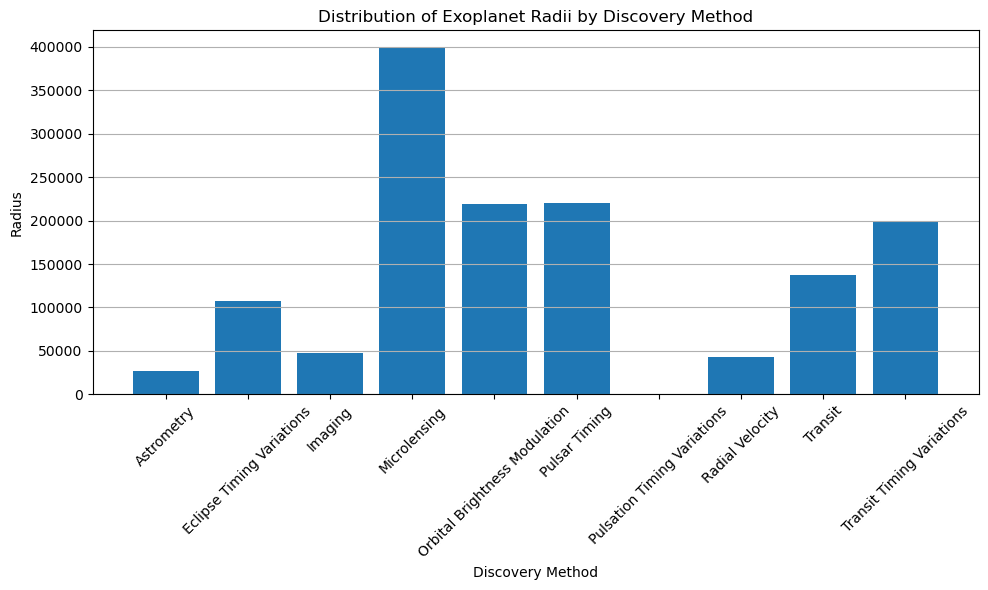

In [18]:
# 10. Plot the distribution of exoplanet radii by discovery method.
mean_radius_by_method = df.groupby('method')['radius'].mean()

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(mean_radius_by_method.index, mean_radius_by_method.values)
plt.xlabel('Discovery Method')
plt.ylabel('Radius')
plt.title('Distribution of Exoplanet Radii by Discovery Method')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()